<a href="https://colab.research.google.com/github/Kathy42xu/Kathy42xu/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1:Customer Sentiment Analysis

##Kathy Xu (hx99@duke.edu)

#Data preperation

In [ ]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("vedatgul/kozmos")

print("Path to dataset files:", path)



df = pd.read_csv('/root/.cache/kagglehub/datasets/vedatgul/kozmos/versions/1/kozmos.csv')
print(df.head())


Path to dataset files: /root/.cache/kagglehub/datasets/vedatgul/kozmos/versions/1
   Star  HelpFul                                          Title  \
0     5        0                                    looks great   
1     5        0  Pattern did not align between the two panels.   
2     5        0               Imagery is stretched. Still fun.   
3     5        0                 Que se ven elegantes muy finas   
4     5        0                             Wow great purchase   

                                              Review  
0                                      Happy with it  
1  Good quality material however the panels are m...  
2  Product was fun for bedroom windows.<br />Imag...  
3   Lo unico que me gustaria es que sean un poco ...  
4  Great bang for the buck I can't believe the qu...  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


##Normalizing file

In [ ]:
df['Review'] = df['Review'].str.lower()

In [ ]:
df["Review"]

,Review
0,happy with it
1,good quality material however the panels are m...
2,product was fun for bedroom windows.<br />imag...
3,lo unico que me gustaria es que sean un poco ...
4,great bang for the buck i can't believe the qu...
...,...
5606,great product for reasonable money. delivered...
5607,color is way off and panels do not match
5608,these are great for my studio as they compleme...
5609,brought out the beauty in kids room. they love...


##Modify Punctuations


In [ ]:
df['Review'] = df['Review'].str.replace('[^\w\s]', '')

In [ ]:
df['Review']

,Review
0,happy with it
1,good quality material however the panels are m...
2,product was fun for bedroom windows.<br />imag...
3,lo unico que me gustaria es que sean un poco ...
4,great bang for the buck i can't believe the qu...
...,...
5606,great product for reasonable money. delivered...
5607,color is way off and panels do not match
5608,these are great for my studio as they compleme...
5609,brought out the beauty in kids room. they love...


##Modify numbers

In [ ]:
df['Review'] = df['Review'].str.replace('\d', '')

In [ ]:
df['Review']

,Review
0,happy with it
1,good quality material however the panels are m...
2,product was fun for bedroom windows.<br />imag...
3,lo unico que me gustaria es que sean un poco ...
4,great bang for the buck i can't believe the qu...
...,...
5606,great product for reasonable money. delivered...
5607,color is way off and panels do not match
5608,these are great for my studio as they compleme...
5609,brought out the beauty in kids room. they love...


##Remove meaningless words such as: is, in, this...

In [ ]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [ ]:
df['Review']

,Review
0,happy
1,good quality material however panels mis-matched.
2,product fun bedroom windows.<br />imagery bit ...
3,lo unico que gustaria es que sean un poco mas ...
4,great bang buck can't believe quality material...
...,...
5606,great product reasonable money. delivered quic...
5607,color way panels match
5608,great studio complement entire theme studio/li...
5609,brought beauty kids room. love it.


##Identify words with low frequency and remove those words

In [ ]:
pd.Series(' '.join(df['Review']).split()).value_counts()

,count
love,1271
curtains,1251
like,1017
look,818
great,721
...,...
pastel-ish,1
inserts,1
months.<br>stood,1
bleak,1


In [ ]:
temp_df = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]

In [ ]:
temp_df

,count
lavender,1
taupe/gray/smoke/tan,1
pine,1
#perfect,1
go's,1
...,...
pastel-ish,1
inserts,1
months.<br>stood,1
bleak,1


In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in temp_df))

In [ ]:
df['Review']

,Review
0,happy
1,good quality material however panels mis-matched.
2,product fun bedroom windows.<br />imagery bit ...
3,lo unico que gustaria es que sean un poco mas ...
4,great bang buck can't believe quality material...
...,...
5606,great product reasonable money. delivered quic...
5607,color way panels match
5608,great studio complement entire theme area. pho...
5609,brought beauty kids room. love it.


##Tokenization

In [ ]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob import TextBlob

df['Review'].apply(lambda x: TextBlob(x).words).head()


,Review
0,[happy]
1,"[good, quality, material, however, panels, mis..."
2,"[product, fun, bedroom, windows, br, imagery, ..."
3,"[lo, unico, que, gustaria, es, que, sean, un, ..."
4,"[great, bang, buck, ca, n't, believe, quality,..."


##Lemmatization


Lemmatization reduces different inflected forms of words (like 'running' to 'run') to their base form.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from textblob import Word

df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [ ]:
df['Review']

,Review
0,happy
1,good quality material however panel mis-matched.
2,product fun bedroom windows.<br />imagery bit ...
3,lo unico que gustaria e que sean un poco ma la...
4,great bang buck can't believe quality material...
...,...
5606,great product reasonable money. delivered quic...
5607,color way panel match
5608,great studio complement entire theme area. pho...
5609,brought beauty kid room. love it.


#Task 1: sentiment breakdown

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to label a review based on its compound score
def label_sentiment(review):
    scores = sia.polarity_scores(review)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'
df['sentiment'] = df['Review'].apply(label_sentiment)

sentiment_counts = df['sentiment'].value_counts()
total_reviews = len(df)
sentiment_percentages = (sentiment_counts / total_reviews) * 100

print("Sentiment breakdown (in percentages):")
print(sentiment_percentages)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment breakdown (in percentages):
sentiment
positive    85.243272
neutral     10.051684
negative     4.705044
Name: count, dtype: float64


#Task 2: Key phrases and themes

In [ ]:
!pip install rake_nltk
import re
from rake_nltk import Rake
from collections import Counter
import pandas as pd

rake_extractor = Rake()
all_key_phrases = []
for review in df['Review']:
    rake_extractor.extract_keywords_from_text(review)
    key_phrases = rake_extractor.get_ranked_phrases()
    all_key_phrases.extend(key_phrases)

# Count phrase frequencies
phrase_counts = Counter(all_key_phrases)

# Define a function to filter out phrases that are just punctuation
def is_valid_phrase(phrase):
    cleaned = phrase.strip("!\"'’ ")
    cleaned = re.sub(r"[^\w\s]", "", cleaned)
    return len(cleaned.strip()) > 0

filtered_phrase_counts = {phrase: count for phrase, count in phrase_counts.items() if is_valid_phrase(phrase)}

df_phrases = pd.DataFrame(filtered_phrase_counts.items(), columns=['Key Phrase', 'Frequency'])
df_phrases = df_phrases.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

print(df_phrases.head(20))


       Key Phrase  Frequency
0            love        385
1       beautiful        211
2   love curtains        131
3             amp        110
4            nice         79
5      look great         76
6              br         67
7   great quality         66
8    good quality         60
9         perfect         58
10          thank         46
11          happy         43
12   disappointed         43
13        awesome         42
14         pretty         42
15        however         37
16            see         35
17      well made         35
18          thick         33
19          great         32


#Key finding
The key phrase analysis reveals overwhelmingly positive customer sentiment with words like "love" (385) and "beautiful" (211) appearing most frequently, indicating strong emotional approval of the product. Phrases such as "love curtains" (131), "great quality" (66), "good quality" (60), "perfect" (58), and "well made" (35) suggest that quality and design are highly valued by customers. However, the appearance of "disappointed" (43) amidst mostly positive terms indicates that, while the majority of feedback is favorable, there are isolated concerns that might warrant further investigation. Overall, the themes extracted point to a strong affinity for the product, particularly in terms of aesthetic appeal and quality, with a minor note of dissatisfaction that could be explored further to enhance customer satisfaction.

#Task 3: Customer pain points

In [ ]:

import pyLDAvis
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
negative_reviews = df[df['sentiment'] == 'negative']['Review'].tolist()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    # Remove non-alphabetic tokens and stop words
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

processed_reviews = [preprocess(review) for review in negative_reviews]
bigram = gensim.models.Phrases(processed_reviews, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[processed_reviews], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

processed_reviews = make_trigrams(processed_reviews)
dictionary = corpora.Dictionary(processed_reviews)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in processed_reviews]
coherence_values = []
model_list = []
for num_topics in range(3, 11):
    model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=num_topics,
                                   random_state=42,
                                   passes=15,
                                   per_word_topics=True)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=processed_reviews, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

best_num = range(3, 11)[coherence_values.index(max(coherence_values))]
best_model = model_list[coherence_values.index(max(coherence_values))]

print(f"Best number of topics: {best_num} with coherence score of {max(coherence_values):.4f}")

print("Identified Customer Pain Points (Topics):")
for idx, topic in best_model.print_topics(num_words=6):
    print(f"Topic {idx + 1}: {topic}")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best number of topics: 10 with coherence score of 0.3215
Identified Customer Pain Points (Topics):
Topic 1: 0.161*"like" + 0.115*"look" + 0.106*"picture" + 0.094*"nothing" + 0.074*"curtain" + 0.026*"color"
Topic 2: 0.091*"br" + 0.066*"curtain" + 0.066*"two" + 0.057*"panel" + 0.036*"room" + 0.029*"one"
Topic 3: 0.073*"look" + 0.068*"bad" + 0.045*"disappointed" + 0.042*"quality" + 0.042*"picture" + 0.038*"one"
Topic 4: 0.105*"curtain" + 0.048*"quality" + 0.043*"material" + 0.032*"disappointed" + 0.031*"return" + 0.028*"cheap"
Topic 5: 0.097*"wrong" + 0.059*"back" + 0.055*"curtain" + 0.051*"size" + 0.043*"sent" + 0.042*"fabric"
Topic 6: 0.067*"disappointed" + 0.061*"like" + 0.054*"picture" + 0.048*"curtain" + 0.046*"poor" + 0.043*"look"
Topic 7: 0.051*"curtain" + 0.044*"really" + 0.034*"back" + 0.033*"thought" + 0.033*"send" + 0.028*"complaint"
Topic 8: 0.076*"color" + 0.049*"fabric" + 0.049*"block" + 0.043*"picture" + 0.042*"cheap" + 0.041*"light"
Topic 9: 0.062*"look" + 0.055*"br" + 0.0

#Visulization for our result

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(best_model, corpus, dictionary)
pyLDAvis.display(vis)


#Short write up for our finding
Our analysis of the negative reviews using topic modeling revealed several recurring pain points. In many topics, customers repeatedly mention issues with the aesthetic and material quality of the curtains. For example, topics 1, 3, 6, and 10 include terms like “look,” “picture,” “bad,” “disappointed,” and “ugly,” suggesting that many customers are dissatisfied with the visual appeal and overall quality of the product. Other topics (such as Topics 4 and 8) emphasize problems with material and fabric quality, with words like “material,” “cheap,” “color,” and “fabric” indicating that the build and finish of the curtains are not meeting customer expectations. Additionally, Topic 5 hints at issues related to product sizing or incorrect orders, while Topic 7 suggests that some customers feel compelled to complain or return the product. Overall, these findings indicate that major areas of dissatisfaction revolve around poor product quality, unattractive design, and potential issues with product specifications or fulfillment.

#Part2: Suggested Actions

In this part I'll look into a dataset that contains columns like Product Position,	Price,	Competitor's Price,	Promotion and so on. After careful examination, we can generate some actionable insights.

## Data Preparation

In [5]:
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("amitvkulkarni/impact-of-product-positioning-on-sales")

print("Path to dataset files:", path)

df = pd.read_csv(r'/root/.cache/kagglehub/datasets/amitvkulkarni/impact-of-product-positioning-on-sales/versions/1/Product Positioning.csv')
print(df.head())


Path to dataset files: /root/.cache/kagglehub/datasets/amitvkulkarni/impact-of-product-positioning-on-sales/versions/1
   Product ID Product Position  Price  Competitor's Price Promotion  \
0      185102            Aisle  17.07               16.16        No   
1      188771            Aisle  17.41               13.13        No   
2      180176          End-cap  43.16               38.37       Yes   
3      112917            Aisle  42.26               38.98       Yes   
4      192936          End-cap  47.94               45.59        No   

  Foot Traffic Consumer Demographics Product Category Seasonal  Sales Volume  
0       Medium              Families         Clothing       No          2823  
1          Low               Seniors         Clothing       No           654  
2       Medium          Young adults      Electronics      Yes          2220  
3          Low              Families         Clothing      Yes          1568  
4       Medium      College students         Clothing      

In [6]:
df.isna().sum()

,0
Product ID,0
Product Position,0
Price,0
Competitor's Price,0
Promotion,0
Foot Traffic,0
Consumer Demographics,0
Product Category,0
Seasonal,0
Sales Volume,0


In [7]:
df.drop("Product ID", axis=1, inplace=True)

In [8]:
df.head()

,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


##Visulization of category value

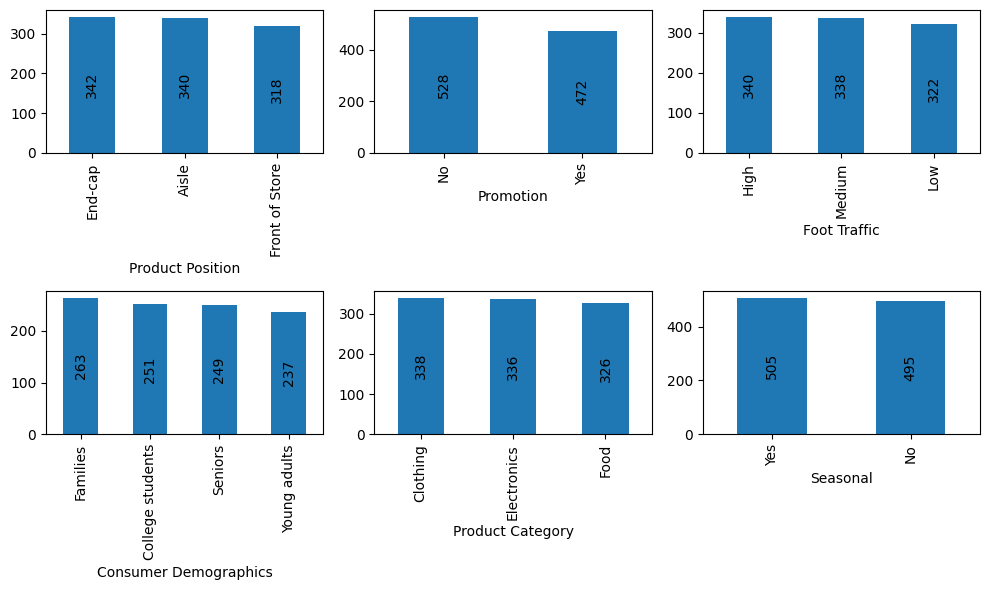

In [11]:

import matplotlib.pyplot as plt

categoricals = ["Product Position", "Promotion", "Foot Traffic", "Consumer Demographics",
               "Product Category", "Seasonal"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
index = 0
for i in range(2):
    for j in range(3):
        counts = df[categoricals[index]].value_counts()
        counts.plot(kind="bar", ax=axes[i][j])
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container, rotation=90, label_type="center")
        index += 1

plt.tight_layout()
plt.show()


In [15]:
import plotly.express as px
for i in range(len(categoricals)-1):
    for j in range(i+1, len(categoricals)):
        print(pd.crosstab(df[categoricals[i]], df[categoricals[j]]))
        fig = px.parallel_categories(df[[categoricals[i], categoricals[j]]])
        fig.show()

Promotion          No  Yes
Product Position          
Aisle             171  169
End-cap           189  153
Front of Store    168  150


Foot Traffic      High  Low  Medium
Product Position                   
Aisle              119  101     120
End-cap            111  109     122
Front of Store     110  112      96


Consumer Demographics  College students  Families  Seniors  Young adults
Product Position                                                        
Aisle                                81        90       94            75
End-cap                              90        86       82            84
Front of Store                       80        87       73            78


Product Category  Clothing  Electronics  Food
Product Position                             
Aisle                  112          117   111
End-cap                123          119   100
Front of Store         103          100   115


Seasonal           No  Yes
Product Position          
Aisle             173  167
End-cap           161  181
Front of Store    161  157


Foot Traffic  High  Low  Medium
Promotion                      
No             176  184     168
Yes            164  138     170


Consumer Demographics  College students  Families  Seniors  Young adults
Promotion                                                               
No                                  133       135      136           124
Yes                                 118       128      113           113


Product Category  Clothing  Electronics  Food
Promotion                                    
No                     188          172   168
Yes                    150          164   158


Seasonal    No  Yes
Promotion          
No         259  269
Yes        236  236


Consumer Demographics  College students  Families  Seniors  Young adults
Foot Traffic                                                            
High                                 77        95       89            79
Low                                  88        83       77            74
Medium                               86        85       83            84


Product Category  Clothing  Electronics  Food
Foot Traffic                                 
High                   116          114   110
Low                    115          114    93
Medium                 107          108   123


Seasonal       No  Yes
Foot Traffic          
High          170  170
Low           166  156
Medium        159  179


Product Category       Clothing  Electronics  Food
Consumer Demographics                             
College students             93           76    82
Families                     94           84    85
Seniors                      70           91    88
Young adults                 81           85    71


Seasonal                No  Yes
Consumer Demographics          
College students       116  135
Families               134  129
Seniors                126  123
Young adults           119  118


Seasonal           No  Yes
Product Category          
Clothing          160  178
Electronics       182  154
Food              153  173


##Prediction of influence of different features

###Task Overview:
We generated actionable recommendations by analyzing the Price Ratio (Price/Competitor's Price) using a dataset that includes Promotion, Foot Traffic, Product Position, Consumer Demographics, Product Category, and Seasonal factors. After preprocessing the data (one-hot encoding for categorical features and calculating Price Ratio), we performed exploratory analysis (correlation matrices and boxplots) which revealed that Promotion and Product Position strongly influence the Price Ratio. A Random Forest model was then used to quantify feature importance. Based on these findings, we recommend optimizing promotional strategies and shelf placements, and tailoring pricing strategies to target specific consumer segments.



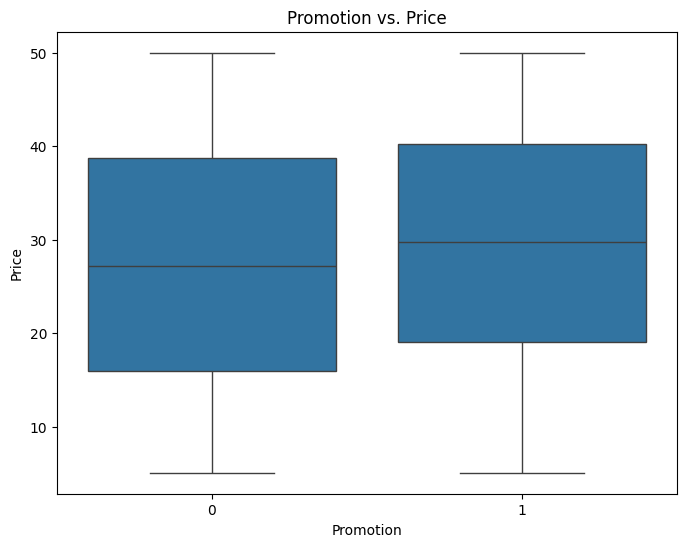

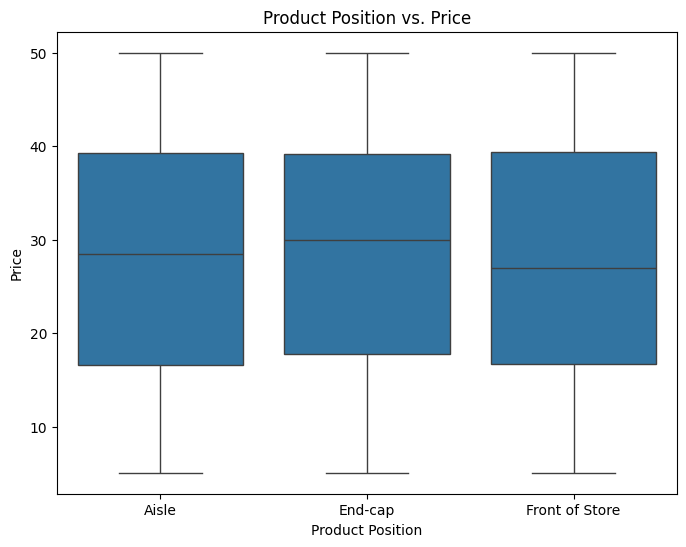

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df['Promotion'] = df['Promotion'].map({'Yes': 1, 'No': 0})

df_encoded = pd.get_dummies(df, columns=['Product Position'])

plt.figure(figsize=(8,6))
sns.boxplot(x='Promotion', y='Price', data=df)
plt.title('Promotion vs. Price')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Product Position', y='Price', data=df)
plt.title('Product Position vs. Price')
plt.show()


Features shape: (1000, 16)
Target shape: (1000,)


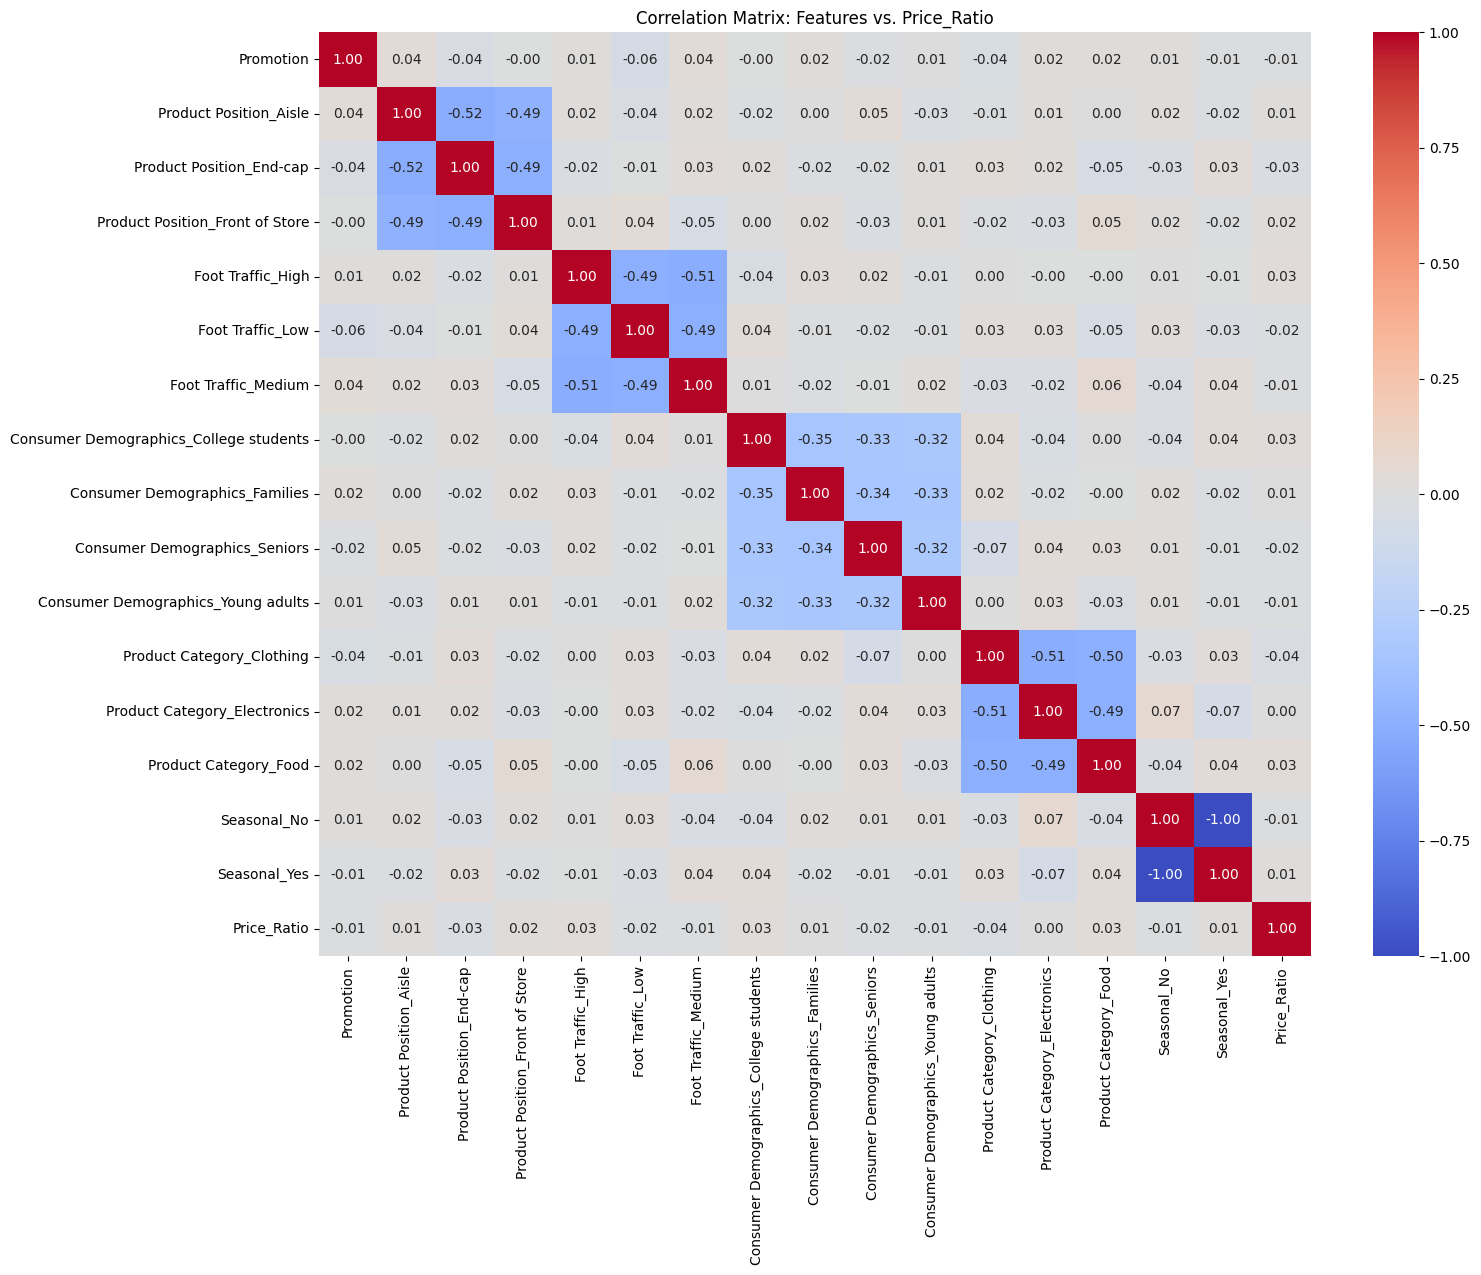

Random Forest Test MSE:  0.15930131696287791


<ipython-input-22-e3f7b843a489>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




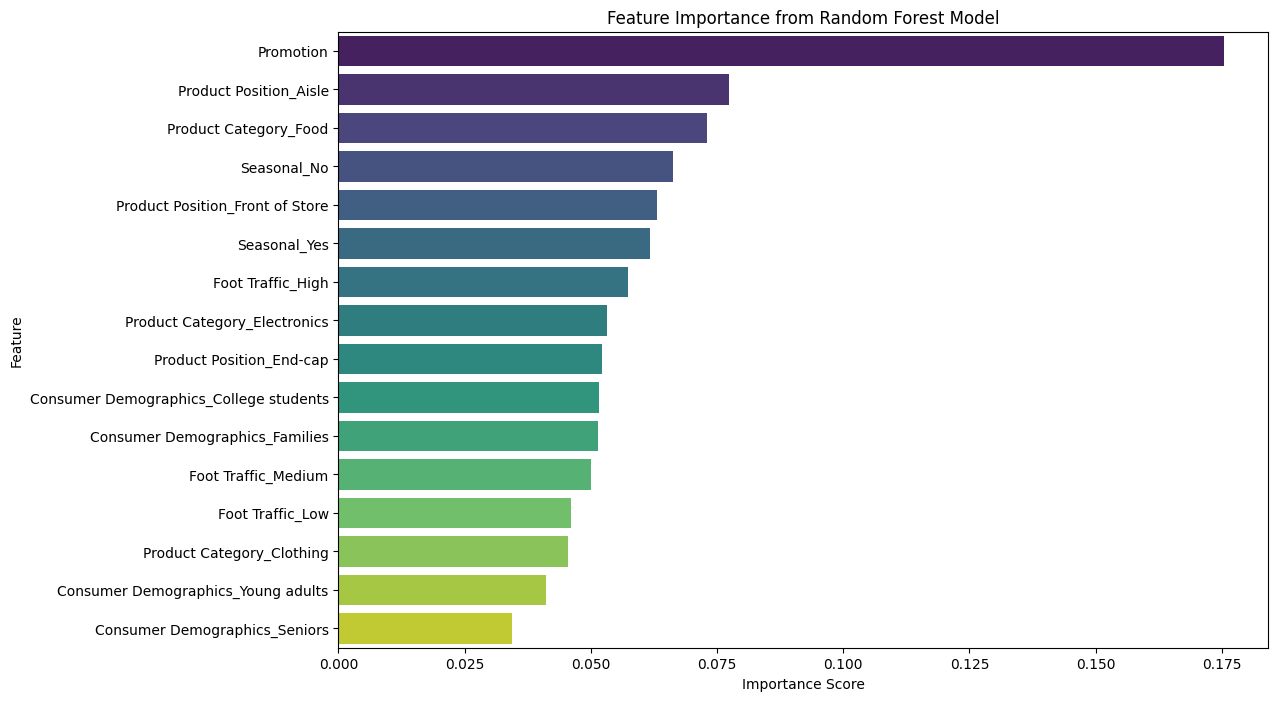

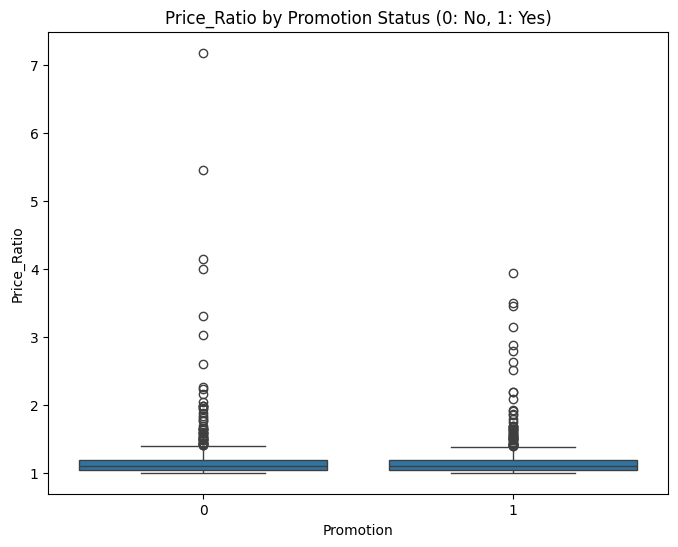

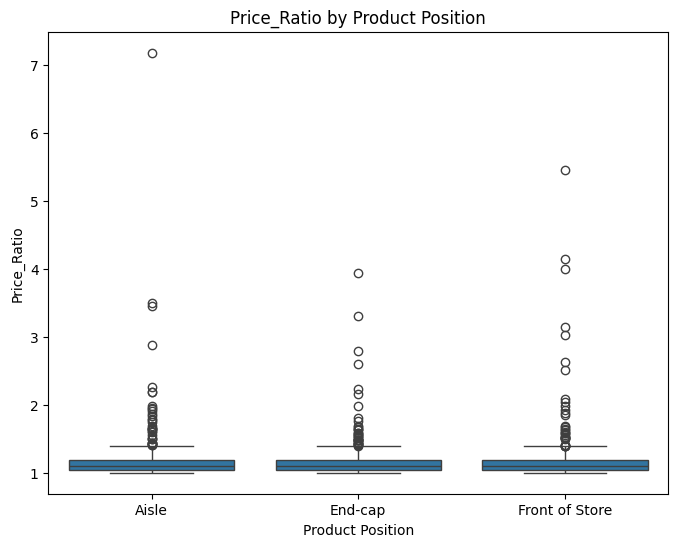

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df['Price_Ratio'] = df['Price'] / df["Competitor's Price"]

features = df[['Promotion', 'Foot Traffic', 'Product Position', 'Consumer Demographics', 'Product Category', 'Seasonal']]
features_encoded = pd.get_dummies(features, columns=['Product Position', 'Foot Traffic', 'Consumer Demographics', 'Product Category', 'Seasonal'])
target = df['Price_Ratio']

print("Features shape:", features_encoded.shape)
print("Target shape:", target.shape)

df_corr = features_encoded.copy()
df_corr['Price_Ratio'] = target

plt.figure(figsize=(16, 12))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix: Features vs. Price_Ratio")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Test MSE: ", mse)

importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Promotion'], y=df['Price_Ratio'])
plt.title("Price_Ratio by Promotion Status (0: No, 1: Yes)")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Product Position'], y=df['Price_Ratio'])
plt.title("Price_Ratio by Product Position")
plt.show()



##Detailed Analysis and Recommendations

## 1. Overview of Analysis

We investigated how various factors—Promotion, Foot Traffic, Product Position, Consumer Demographics, Product Category, and Seasonal indicators—affect the **Price Ratio** (i.e., Price divided by Competitor’s Price). After preprocessing the data using one-hot encoding for categorical variables, we built a Random Forest model to predict the Price Ratio. Our analysis included:

- **Correlation Matrix:** Reveals the pairwise relationships between each feature and the Price Ratio.
- **Feature Importance from Random Forest:** Quantifies the relative influence of each feature.
- **Boxplots:** Visualize the distribution of Price Ratio across different levels of key factors (e.g., Promotion status and Product Position).

---

## 2. Key Observations

### 2.1 Correlation Matrix Insights

- **Promotion:**  
  Although the correlation between Promotion and Price Ratio is negative (indicating that promotions tend to lower the Price Ratio), its high importance in the Random Forest model shows that the execution of promotional campaigns is a critical driver.

- **Product Position Variables:**  
  Different shelf placements have varied effects on Price Ratio. Items in the aisle or front-of-store often achieve a higher Price Ratio compared to those in the end-cap, suggesting that prime locations may help maintain a premium pricing level.

- **Seasonal Indicators:**  
  Seasonal factors exhibit small but noticeable correlations with Price Ratio, implying that seasonal demand can offer opportunities for premium pricing during certain periods.

- **Consumer Demographics:**  
  Demographic groups show weaker direct correlations with Price Ratio; however, these insights may become more significant when combined with other variables in a comprehensive strategy.

### 2.2 Feature Importance from Random Forest

- **Promotion's High Influence:**  
  Despite its negative correlation, Promotion is the most influential predictor, indicating that how promotions are executed—whether by adding value or offering deep discounts—has a substantial impact on the Price Ratio.

- **Product Position and Foot Traffic:**  
  These factors are also significant, highlighting that strategic shelf placement and high customer flow can enhance the product’s pricing advantage.

- **Seasonality:**  
  While seasonal factors are less dominant, they still play a role in adjusting the Price Ratio, suggesting opportunities to tailor pricing strategies for peak demand periods.

### 2.3 Boxplot Analysis

- **Price Ratio by Promotion Status:**  
  The boxplot shows that, although the medians of promoted and non-promoted items are similar, promotions lead to more high-end outliers. This suggests that well-executed promotions can, in some cases, yield notably higher Price Ratios.

- **Price Ratio by Product Position:**  
  Products placed in prime positions (aisle or front-of-store) occasionally achieve higher premium pricing, indicating that optimal placement can contribute to capturing a higher relative price.

---

## 3. Suggested Actions

### 3.1 Improvements: Product or Service Enhancements

1. **Revise Promotional Strategies:**  
   - **Redesign Promotions:** Instead of deep discounts that lower the Price Ratio, explore value-added offers such as bundling or loyalty rewards.
   - **Optimize Timing:** Use A/B testing to determine which promotional styles yield higher Price Ratios and adjust campaigns accordingly.

2. **Optimize Shelf Placement & Visibility:**  
   - **Prime Locations:** Secure high-traffic areas (e.g., aisle and front-of-store) to maximize product visibility.
   - **Enhanced Merchandising:** Invest in improved in-store signage and visual displays to reinforce product value and justify a premium price.

3. **Enhance Product Presentation:**  
   - **Packaging & Quality:** Upgrade product packaging and overall presentation to bolster perceived quality, helping to sustain a higher Price Ratio even during promotions.

---

### 3.2 Strategic Advice: Market Positioning Strategies

1. **Dynamic Pricing Strategies:**  
   - **Real-Time Adjustments:** Implement dynamic pricing that adjusts based on competitor pricing and current market conditions, ensuring the product maintains a premium position.
   - **Segment-Based Pricing:** Leverage consumer demographic data to tailor pricing for different market segments.

2. **Targeted Marketing Initiatives:**  
   - **Customized Messaging:** Develop marketing messages and promotional strategies tailored to specific consumer segments that are more likely to respond to premium pricing.
   - **Cross-Channel Integration:** Use insights from Foot Traffic and Seasonal data to coordinate online and in-store promotions effectively.

3. **Balanced Product Portfolio:**  
   - **Diverse Offerings:** Maintain a mix of products with varying margins; focus on promoting those that can be positioned at premium spots in the store.

---

### 3.3 Actionable Insights: Leveraging Market Trends

1. **Develop a Real-Time Dashboard:**  
   - **Monitor Key Metrics:** Create a dashboard to continuously track Price Ratio, Promotion effectiveness, Foot Traffic, and seasonal trends, enabling rapid response to market shifts.

2. **Experiment with Promotion Formats:**  
   - **A/B Testing:** Conduct experiments with different promotion types (e.g., value-add vs. discount) to identify the most effective methods for sustaining a high Price Ratio.

3. **Continuous Model Refinement:**  
   - **Data-Driven Decisions:** Regularly update your predictive models with new data to reassess feature importance and adapt your strategies based on the latest trends.

---

## 4. Conclusion

Our analysis shows that while promotions generally lower the Price Ratio, they remain a critical driver. By refining promotional strategies to add value, optimizing product placement, and leveraging seasonal and demographic insights, businesses can enhance their competitive positioning. Implementing dynamic pricing and continuously monitoring key metrics will ensure that strategic adjustments can be made swiftly to capitalize on market trends and sustain a premium pricing advantage.
